## Workshop Notebook

A notebook for creating graphs and interacting with implementation code in a more interactive way. Use at your convenience.

In [1]:
from bandit import *

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def plot(nsteps:int, fns:list, params:list, labels:list):
    assert len(fns) == len(params) == len(labels), "Number of functions, the number of function parameter collections, and the number of their labels must be the same."
    for i, fn in enumerate(fns):
        runs = fn(**params[i], nsteps=nsteps)
        plt.plot(runs, label=labels[i])

    plt.xlabel("step")
    plt.ylabel("average reward over 100 runs at step")
    plt.legend(labels)
    plt.show()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46

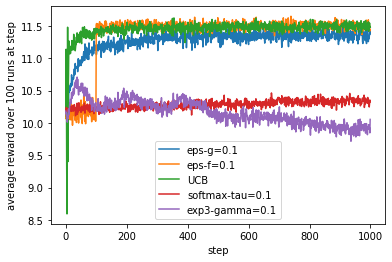

In [3]:
# peer_arms = [PeerArm(2, 1), PeerArm(4, 1), PeerArm(6, 1), PeerArm(8, 1), PeerArm(10, 1)]
peer_arms = create_peers(10, 
    np.random.poisson, dict(lam=5.0), 
    np.random.normal, dict(loc=10.0, scale=1.5), 
    np.random.normal, dict(loc=0.5, scale=0.1))

plot(
    1000,
    [epsilon, epsilon, UCB, softmax, exp3], 
    [dict(strategy="eps-greedy", arms=peer_arms, eps=0.1, timesteps=20), 
    dict(strategy="eps-first", arms=peer_arms, eps=0.1, timesteps=20),
    dict(strategy="UCB", arms=peer_arms, timesteps=20),
    dict(arms=peer_arms, tau=0.1, timesteps=20),
    dict(arms=peer_arms, gamma=0.1, timesteps=20)], 
    ["eps-g=0.1", "eps-f=0.1", "UCB", "softmax-tau=0.1", "exp3-gamma=0.1"])

# plot(
#     40000,
#     [epsilon, softmax], 
#     [dict(strategy="eps-greedy", arms=peer_arms, eps=0.1), 
#     dict(arms=peer_arms, tau=0.1)], 
#     ["eps-g=0.1", "softmax-tau=0.1"])

# plot(
#     [epsilon, softmax, UCB, UCB], 
#     [dict(strategy="eps-greedy", arms=peer_arms, eps=0.1),
#     dict(arms=peer_arms, tau=0.1),
#     dict(strategy="UCB", arms=peer_arms),
#     dict(strategy="UCB-1", arms=peer_arms)], 
#     ["eps-g=0.1", "softmax-tau=0.1", "UCB", "UCB-1"])